In [1]:
import json

with open('../data/train.json', 'r') as file:
    train_data = json.load(file)

with open('../data/dev.json', 'r') as file:
    test_data = json.load(file)

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [3]:
class Dataset_Reader(Dataset):
    def __init__(self, data):
        self.data = data

        self.texts = []
        self.labels = []
        for idx, document in enumerate(data):
            current_id = document['id']
            # current_meta = document['meta']['group']
            for annotation in document['annotations']:
                for sentence in annotation['result']:
                    text = sentence['value']['text'].lower().replace('\n', '')
                    label = sentence['value']['labels'][0]

                    self.texts.append(text)
                    self.labels.append(label)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return {
            'text': self.texts[idx],
            'label': self.labels[idx],
        }

In [4]:
data_train = Dataset_Reader(train_data)
data_test = Dataset_Reader(test_data)

In [5]:
print(f"Number of documents for training : {len(train_data)}")
print(f"Number of documents for testing : {len(test_data)}")
print(f"Number of sentences for training : {len(data_train)}")
print(f"Number of sentences for testing : {len(data_test)}")

Number of documents for training : 247
Number of documents for testing : 30
Number of sentences for training : 28986
Number of sentences for testing : 2890


In [6]:
from collections import Counter

In [7]:
Counter(data_train.labels)

Counter({'PREAMBLE': 4167,
         'NONE': 1423,
         'FAC': 5744,
         'ARG_RESPONDENT': 698,
         'RLC': 752,
         'ARG_PETITIONER': 1315,
         'ANALYSIS': 10695,
         'PRE_RELIED': 1431,
         'RATIO': 674,
         'RPC': 1081,
         'ISSUE': 367,
         'STA': 481,
         'PRE_NOT_RELIED': 158})

In [8]:
Counter(data_test.labels)

Counter({'PREAMBLE': 509,
         'ANALYSIS': 986,
         'NONE': 192,
         'FAC': 581,
         'RLC': 116,
         'ARG_PETITIONER': 70,
         'STA': 29,
         'PRE_RELIED': 142,
         'RPC': 92,
         'ISSUE': 51,
         'RATIO': 72,
         'ARG_RESPONDENT': 38,
         'PRE_NOT_RELIED': 12})

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

/home/kshitij/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
plot_data = Counter(data_train.labels)
plot_data = dict(sorted(plot_data.items(), key=lambda item: item[1], reverse= True))

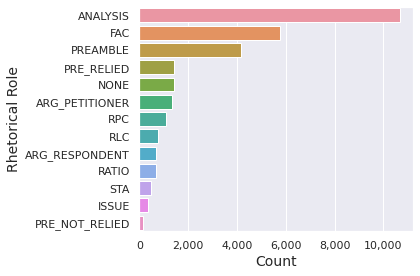

In [13]:
sns.set_theme('notebook')
fig, ax = plt.subplots()
sns.barplot(ax= ax, x= list(plot_data.values()), y= list(plot_data.keys()))
# ax.set_yticks(ticks= range(len(plot_data)), labels= ['PREAMBLE', 'NONE', 'FACT', 'ARGUMENT RESPONDENT', 'RULING BY LOWER COURT', 
            #   'ARGUMENT PETITIONER', 'ANALYSIS', 'PRECEDENT RELIED UPON', 'RATIO', 
            #   'RULING BY PRESENT COURT', 'ISSUE', 'STATUTE', 'PRECEDENT NOT RELIED UPON'], rotation=45);
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));
ax.set_xlabel("Count",fontdict= {'fontsize':14});
ax.set_ylabel("Rhetorical Role",fontdict= {'fontsize':14});
fig.tight_layout()
fig.savefig("../output/LabelDistribution.png", dpi=300)

In [14]:
from operator import itemgetter

In [15]:
print(f"Percentage of data by top 3: {sum(itemgetter('ANALYSIS','FAC','PREAMBLE')(plot_data)) / len(data_train)}")

Percentage of data by top 3: 0.7108949147864486


In [16]:
print(f"Percentage of data by bottom 3: {sum(itemgetter('STA','ISSUE','PRE_NOT_RELIED')(plot_data)) / len(data_train)}")

Percentage of data by bottom 3: 0.034706409991030154


In [11]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'texts': data_train.texts, 'labels': data_train.labels})
df.sample(10)

,texts,labels
154,10/11 question of law and the suggested substa...,RATIO
11734,"through: mr. satish aggarwala, advocate.",PREAMBLE
14929,"the person of each one of accused nos. 5, 6 an...",FAC
6121,"f. s. nariman, additional solicitor-general of...",PREAMBLE
22518,6. the averments made in para no.2 of the plai...,FAC
6566,partial penetration within the labia majora of...,PRE_RELIED
15392,the onus of showing this is clearly on the rev...,FAC
19999,"in this backdrop, it is relevant to note that ...",ANALYSIS
21929,two questions therefore arise for consideratio...,ISSUE
27102,"after the marriage, he is staying in b.r.kaval...",ARG_PETITIONER


In [27]:
for i in plot_data.keys():
    t = df[df['labels'] == i].sample().reset_index()
    print(f"{t['labels'][0]} & {t['texts'][0]}")

ANALYSIS & (6) in all rape trials anonymity of the victims must be maintained, as far as necessary.(7) it is necessary, having regard to the directive principles contained under article 38(1) of the constitution of india to set up criminal injuries compensation board.
FAC & it is that which is under challenge in the present petition.
PREAMBLE & the payment ofrs.3 lakhs was not made by the assessee for the grant ofpermission to carry on mining operations within the railwayarea, instead the payment was made towards the cost ofremoving the construction which obstructed the mining opera-tions.
PRE_RELIED &  in begu v. the king emperor (1) the privy council had to deal with a case where certain persons were charged under section 302 of the penal code, but were convicted under section 201 for causing the disappearance of evidence.
NONE & 4. heard the arguments of both the sides. 5.
ARG_PETITIONER & it conveniently forgot that by the attempt attributable to the defendant in alienating the sui

In [22]:
t['labels']

3304    ANALYSIS
Name: labels, dtype: object

In [18]:
avg_len_dict = {}
for i in plot_data.keys():
    avg_len_dict[i] = int(np.mean(df[df.labels == i]['texts'].apply(len)))

In [19]:
np.mean(list(avg_len_dict.values()))

184.3846153846154

In [20]:
np.std(list(avg_len_dict.values()))

58.53537846930161

In [21]:
avg_len_dict

{'ANALYSIS': 170,
 'FAC': 153,
 'PREAMBLE': 124,
 'PRE_RELIED': 214,
 'NONE': 78,
 'ARG_PETITIONER': 195,
 'RPC': 120,
 'RLC': 194,
 'ARG_RESPONDENT': 192,
 'RATIO': 187,
 'STA': 327,
 'ISSUE': 221,
 'PRE_NOT_RELIED': 222}

In [22]:
sorted_avg_len_dict = dict(sorted(avg_len_dict.items(), key=lambda item: item[1], reverse= True))

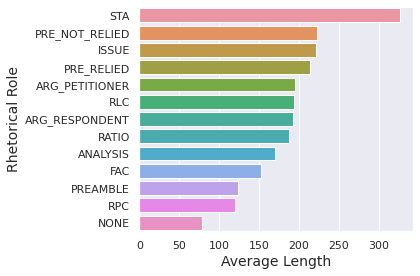

In [23]:
sns.set_theme('notebook')
fig, ax = plt.subplots()
sns.barplot(ax= ax, x= list(sorted_avg_len_dict.values()), y= list(sorted_avg_len_dict.keys()))
# ax.set_yticks(ticks= range(len(plot_data)), labels= ['PREAMBLE', 'NONE', 'FACT', 'ARGUMENT RESPONDENT', 'RULING BY LOWER COURT', 
            #   'ARGUMENT PETITIONER', 'ANALYSIS', 'PRECEDENT RELIED UPON', 'RATIO', 
            #   'RULING BY PRESENT COURT', 'ISSUE', 'STATUTE', 'PRECEDENT NOT RELIED UPON'], rotation=45);
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));
ax.set_xlabel("Average Length",fontdict= {'fontsize':14});
ax.set_ylabel("Rhetorical Role",fontdict= {'fontsize':14});
fig.tight_layout()
fig.savefig("../output/CharacterLen.png", dpi=300)

# 11 Classes

In [2]:
from sklearn.preprocessing import LabelEncoder

list_of_targets_old = ['ISSUE', 'FAC', 'NONE', 'ARG_PETITIONER', 'PRE_NOT_RELIED', 'STA', 'RPC', 'ARG_RESPONDENT', 'PREAMBLE', 'ANALYSIS', 'RLC', 'PRE_RELIED', 'RATIO']
label_encoder_old = LabelEncoder().fit(list_of_targets_old)
list_of_targets_new = ['ISSUE', 'FAC', 'NONE', 'ARG', 'PRE', 'STA', 'RPC', 'PREAMBLE', 'ANALYSIS', 'RLC', 'RATIO']
label_encoder_new = LabelEncoder().fit(list_of_targets_new)


/home/kshitij/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [29]:
def remaplabels(labels):
    for idx, label in enumerate(labels):
        if label == 'ARG_RESPONDENT' or label == 'ARG_PETITIONER':
            labels[idx] = "ARG"
        elif label == 'PRE_NOT_RELIED' or label == 'PRE_RELIED':
            labels[idx] = 'PRE'
            
    return labels

In [31]:
data_train_new = remaplabels(data_train.labels)

In [33]:
plot_data1 = Counter(data_train_new)
plot_data1 = dict(sorted(plot_data1.items(), key=lambda item: item[1], reverse= True))

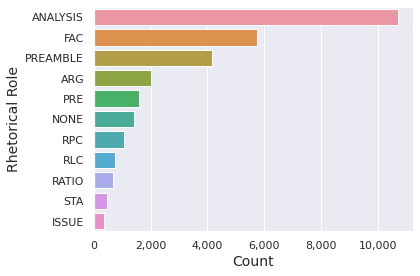

In [34]:
sns.set_theme('notebook')
fig, ax = plt.subplots()
sns.barplot(ax= ax, x= list(plot_data1.values()), y= list(plot_data1.keys()))
# ax.set_yticks(ticks= range(len(plot_data)), labels= ['PREAMBLE', 'NONE', 'FACT', 'ARGUMENT RESPONDENT', 'RULING BY LOWER COURT', 
            #   'ARGUMENT PETITIONER', 'ANALYSIS', 'PRECEDENT RELIED UPON', 'RATIO', 
            #   'RULING BY PRESENT COURT', 'ISSUE', 'STATUTE', 'PRECEDENT NOT RELIED UPON'], rotation=45);
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));
ax.set_xlabel("Count",fontdict= {'fontsize':14});
ax.set_ylabel("Rhetorical Role",fontdict= {'fontsize':14});
fig.tight_layout()
fig.savefig("../output/LabelDistribution2.png", dpi=300)

In [35]:
df = pd.DataFrame({'texts': data_train.texts, 'labels': data_train_new})
df.sample(10)

,texts,labels
5960,the complainant being an innocent lady failed ...,FAC
8743,they only mean that if a considerable portion ...,ANALYSIS
20744,the hon'ble mr. justice anand byrareddy ...,PREAMBLE
9482,5. after filing charge sheet this court has i...,ANALYSIS
19597,the accused has admitted that he and his wife ...,FAC
6450,there is enough contradiction in the evidence ...,ANALYSIS
23466,6. contusion 3/4 in.x1/2 in.,FAC
21149,9. in evidence pw 8 the investigating officer...,ANALYSIS
22207,"however, he did not make any enquiry from the ...",FAC
12726,the special commissioners decided against the ...,PRE


In [37]:
avg_len_dict = {}
for i in plot_data1.keys():
    avg_len_dict[i] = int(np.mean(df[df.labels == i]['texts'].apply(len)))

In [38]:
avg_len_dict

{'ANALYSIS': 170,
 'FAC': 153,
 'PREAMBLE': 124,
 'ARG': 194,
 'PRE': 215,
 'NONE': 78,
 'RPC': 120,
 'RLC': 194,
 'RATIO': 187,
 'STA': 327,
 'ISSUE': 221}

In [39]:
sorted_avg_len_dict = dict(sorted(avg_len_dict.items(), key=lambda item: item[1], reverse= True))
sorted_avg_len_dict

{'STA': 327,
 'ISSUE': 221,
 'PRE': 215,
 'ARG': 194,
 'RLC': 194,
 'RATIO': 187,
 'ANALYSIS': 170,
 'FAC': 153,
 'PREAMBLE': 124,
 'RPC': 120,
 'NONE': 78}

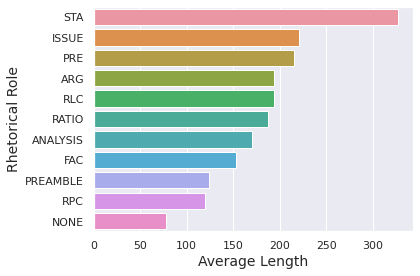

In [40]:
sns.set_theme('notebook')
fig, ax = plt.subplots()
sns.barplot(ax= ax, x= list(sorted_avg_len_dict.values()), y= list(sorted_avg_len_dict.keys()))
# ax.set_yticks(ticks= range(len(plot_data)), labels= ['PREAMBLE', 'NONE', 'FACT', 'ARGUMENT RESPONDENT', 'RULING BY LOWER COURT', 
            #   'ARGUMENT PETITIONER', 'ANALYSIS', 'PRECEDENT RELIED UPON', 'RATIO', 
            #   'RULING BY PRESENT COURT', 'ISSUE', 'STATUTE', 'PRECEDENT NOT RELIED UPON'], rotation=45);
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));
ax.set_xlabel("Average Length",fontdict= {'fontsize':14});
ax.set_ylabel("Rhetorical Role",fontdict= {'fontsize':14});
fig.tight_layout()
fig.savefig("../output/CharacterLen2.png", dpi=300)